Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
dete_survey['Classification'].value_counts()

Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [8]:
dete_survey['Business Unit'].value_counts()

Education Queensland                          54
Information and Technologies                  26
Training and Tertiary Education Queensland    12
Other                                         11
Human Resources                                6
Corporate Strategy and Peformance              5
Early Childhood Education and Care             3
Infrastructure                                 2
Policy, Research, Legislation                  2
Finance                                        1
Corporate Procurement                          1
Indigenous Education and Training Futures      1
Calliope State School                          1
Pacific Pines SHS                              1
Name: Business Unit, dtype: int64

In [9]:
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis = 1)


In [10]:
dete_survey_updated = dete_survey.copy()

In [11]:
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


In [12]:
tafe_survey_updated = tafe_survey.copy()

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')    


In [14]:
tafe_survey_updated = tafe_survey_updated.rename(columns= {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})


In [15]:
tafe_survey_updated.head(5)


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [16]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [17]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:

tafe_resignations_bool = (tafe_survey_updated['separationtype'] == 'Resignation')
tafe_resignations = tafe_survey_updated[tafe_resignations_bool].copy()


In [20]:
dete_resignations_bool = (dete_survey_updated['separationtype'].str.contains('Resignation'))
dete_resignations = dete_survey_updated[dete_resignations_bool].copy()


In [21]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


To answer the question: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
We had to select employees who have resigned

In [22]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [23]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [24]:
pattern = r'([2][0-9]{3})'
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [25]:
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [26]:
dete_resignations['cease_date'].astype(float)

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
        ...  
747    2014.0
751    2013.0
752    2013.0
753    2013.0
755    2013.0
762    2006.0
766    2014.0
769    2013.0
770       NaN
771    2014.0
774       NaN
784    2013.0
786    2014.0
788       NaN
789    2014.0
790    2014.0
791       NaN
794    2013.0
797       NaN
798       NaN
802    2013.0
803    2014.0
804    2014.0
806    2013.0
807    2013.0
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

In [27]:
tafe_resignations['cease_date'].value_counts(dropna=False)

 2011.0    116
 2012.0     94
 2010.0     68
 2013.0     55
NaN          5
 2009.0      2
Name: cease_date, dtype: int64

In [28]:
dete_resignations['cease_date'].value_counts(dropna=False)

2013    146
2012    129
2014     22
NaN      11
2010      2
2006      1
Name: cease_date, dtype: int64

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
dete_resignations['dete_start_date'] =dete_resignations['dete_start_date'].astype("float")
dete_resignations['cease_date']=dete_resignations['cease_date'].astype("float")
dete_resignations['dete_start_date'].value_counts()                                                           

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [31]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

column institute_service contains information about the amount of time an employeee spent in a workplace, this data will help us to answer the question about resignations 

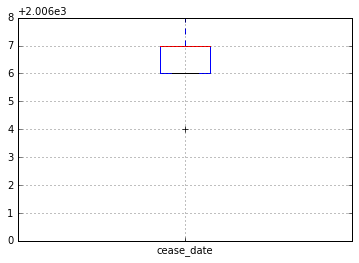

In [32]:
dete_resignations.boxplot(column = 'cease_date')
plt.show()

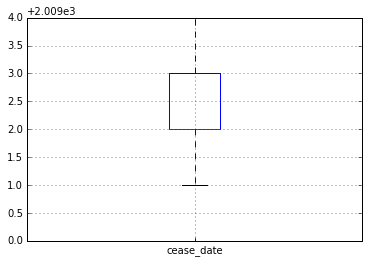

In [33]:
tafe_resignations.boxplot(column = 'cease_date')
plt.show()

Now we will explore the dissatisfaction of the workers

In [34]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [35]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
vals = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations = tafe_resignations[vals].applymap(update_vals)



In [37]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [38]:
tafe_resignations['dissatisfied'] = tafe_resignations[vals].any(axis=1, skipna=False)


In [39]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [40]:
dete_col=['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
dete_resignations['dissatisfied'] = dete_resignations[dete_col].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

We have identified all the employees who resigned because they were dissatisfied in the column dissatisfied

If the employee indicated any of the factors above caused them to resign, we have marked them as dissatisfied in a new column. The new dissatisfied column contains just the following values:

True: indicates a person resigned because they were dissatisfied in some way
False: indicates a person resigned because of a reason other than dissatisfaction with the job
NaN: indicates the value is missing

In [41]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [42]:
dete_resignations_up['institute'] = 'DETE'

In [43]:
tafe_resignations_up['institute'] = 'TAFE'

# Combining the Data

In [44]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                  0
south_sea                                      3
aboriginal                                     7
disability                                     8
nesb                                           9
business_unit                                 32
classification                               161
region                                       265
role_start_date                              271
institute_service                            273
dete_start_date                              283
cease_date                                   300
gender                                       302
age                                          306
employment_status                            307
position                                     308
physical_work_environment                    311
none_of_the_above                            311
study/travel                                 311
separationtype                               311
traumatic_incident  

In [45]:
combined.columns

Index(['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction', 'aboriginal', 'age',
       'business_unit', 'career_move_to_private_sector',
       'career_move_to_public_sector', 'cease_date', 'classification',
       'dete_start_date', 'disability', 'dissatisfaction_with_the_department',
       'dissatisfied', 'employment_conditions', 'employment_status', 'gender',
       'id', 'ill_health', 'institute', 'institute_service',
       'interpersonal_conflicts', 'job_dissatisfaction',
       'lack_of_job_security', 'lack_of_recognition', 'maternity/family',
       'nesb', 'none_of_the_above', 'physical_work_environment', 'position',
       'region', 'relocation', 'role_start_date', 'separationtype',
       'south_sea', 'study/travel', 'torres_strait', 'traumatic_incident',
       'work_life_balance', 'work_location', 'workload'],
      dtype='object')

In [46]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1)

In [47]:
combined_updated=combined.copy()

In [48]:
combined_updated.columns

Index(['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction', 'aboriginal', 'age',
       'business_unit', 'career_move_to_private_sector',
       'career_move_to_public_sector', 'cease_date', 'classification',
       'dete_start_date', 'disability', 'dissatisfaction_with_the_department',
       'dissatisfied', 'employment_conditions', 'employment_status', 'gender',
       'id', 'ill_health', 'institute', 'institute_service',
       'interpersonal_conflicts', 'job_dissatisfaction',
       'lack_of_job_security', 'lack_of_recognition', 'maternity/family',
       'nesb', 'none_of_the_above', 'physical_work_environment', 'position',
       'region', 'relocation', 'role_start_date', 'separationtype',
       'south_sea', 'study/travel', 'torres_strait', 'traumatic_incident',
       'work_life_balance', 'work_location', 'workload'],
      dtype='object')

In [49]:
combined_updated['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [51]:
def experience(years):
    if years <= 3:
        return 'new'
    elif 3 < years <= 6 :
        return 'Experienced'
    elif 7 < years <= 10 :
        return 'Established'
    elif years < 11:
        return 'Veteran'
    elif pd.isnull(years):
        return np.nan

combined_updated['service_cat'] = combined_updated['institute_service'].apply(experience)

# Quick check of the update
combined_updated['service_cat'].value_counts(dropna=False)
    

NaN            478
new             76
Experienced     56
Established     28
Veteran         13
Name: service_cat, dtype: int64

# Perform Initial Analysis

In [52]:

# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)


False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [53]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

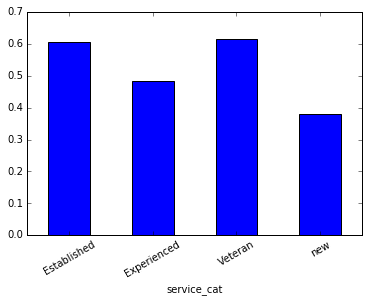

In [55]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
# Plot the results
dis_pct.plot(kind='bar', rot=30, legend=None)


From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.